In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [58]:
df = pd.read_csv("Data/marketing_AB.csv")

In [59]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


## Define Objective
* The Objective is to determine if the marketing ads lead to more conversions compared to showing a PSA.

## Formulate Hypothesis
* Null Hypothesis (H0): The ad does not improve conversion rates compared to the PSA.
* Alternative Hypothesis (H1): The ad improves conversion rates

## Exploratory Data Analysis

In [60]:
df.shape

(588101, 7)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [62]:
df.duplicated("user id").sum()

0

* No duplicated values

In [63]:
df.isna().sum().sum()

0

* No Null Values

In [64]:
# Drop unwanted columns
df = df.drop(columns = ['Unnamed: 0','user id'],axis=1)

In [65]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [66]:
df.dtypes

test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object

In [67]:
# Convert most ads hour to object
df['most ads hour'] = df['most ads hour'].astype(object)

In [68]:
# define categorical columns
cat_cols = df[['test group','converted','most ads day','most ads hour']]
for i in cat_cols.columns:
  print(f"{i.upper()} : {cat_cols[i].unique()}")

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21 3 23 4 8 0 2 15 1 6 17 7 9 5]


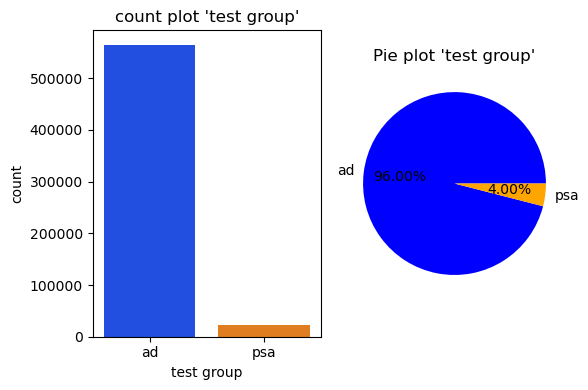

In [69]:
variable = 'test group'
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.countplot(x = df[variable],data=df, palette ='bright')
plt.title(f"count plot '{variable}'")

plt.subplot(1,2,2)
counts = df[variable].value_counts()
plt.pie( counts , labels= counts.index ,colors=['blue','orange'], autopct = "%0.2f%%")
plt.title(f"Pie plot '{variable}'")

plt.tight_layout()
plt.show()

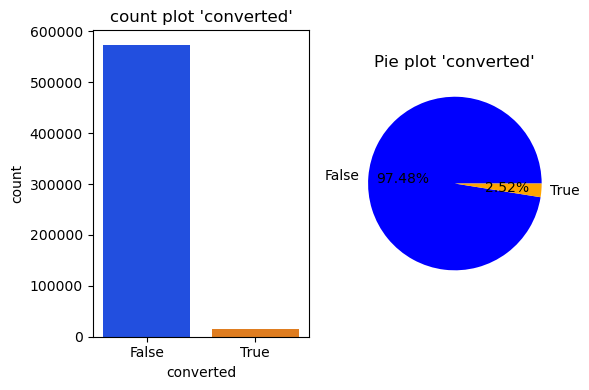

In [70]:
variable = 'converted'
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.countplot(x = df[variable],data=df, palette = 'bright')
plt.title(f"count plot '{variable}'")

plt.subplot(1,2,2)
counts = df[variable].value_counts()
plt.pie( counts , labels= counts.index ,colors=['b','orange'], autopct = "%0.2f%%")
plt.title(f"Pie plot '{variable}'")

plt.tight_layout()
plt.show()

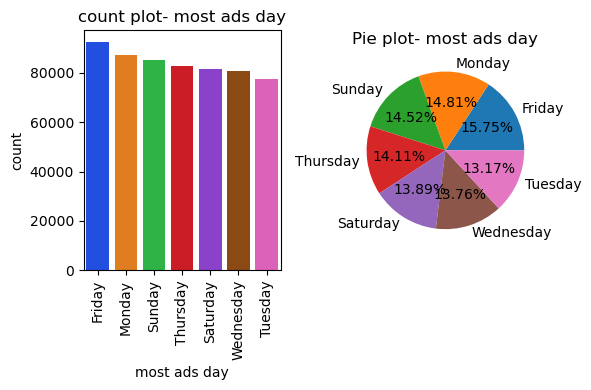

In [71]:
variable = 'most ads day'
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.countplot(x = df[variable],data=df, palette = 'bright',order=df[variable].value_counts().index)
plt.title(f"count plot- {variable}")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
counts = df[variable].value_counts()
plt.pie( counts , labels= counts.index , autopct = "%0.2f%%")
plt.title(f'Pie plot- {variable}')

plt.tight_layout()
plt.show()

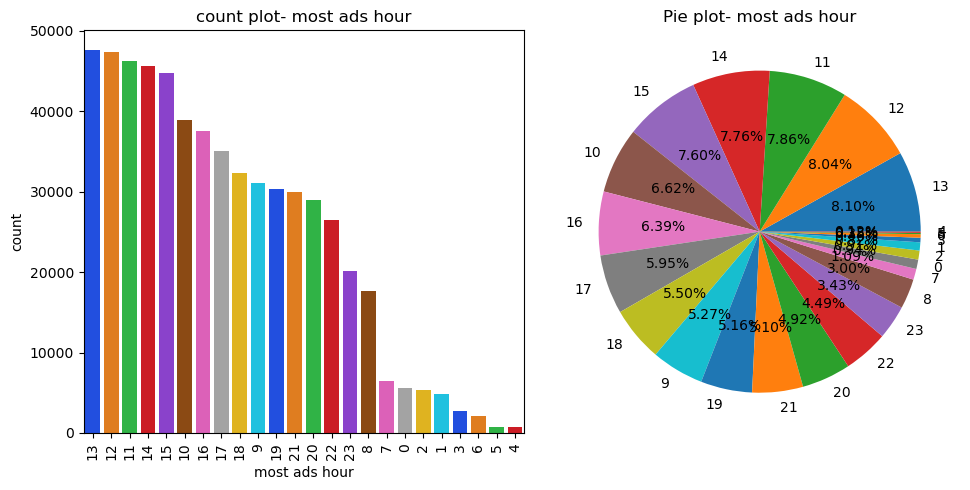

In [72]:
variable = 'most ads hour'
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = df[variable],data=df, palette = 'bright',order=df[variable].value_counts().index)
plt.title(f"count plot- {variable}")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
counts = df[variable].value_counts()
plt.pie( counts , labels= counts.index , autopct = "%0.2f%%")
plt.title(f'Pie plot- {variable}')

plt.tight_layout()
plt.show()

In [73]:
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

In [74]:
pd.crosstab(df['test group'] , df['converted'],normalize = 'index')

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


<Axes: xlabel='test group'>

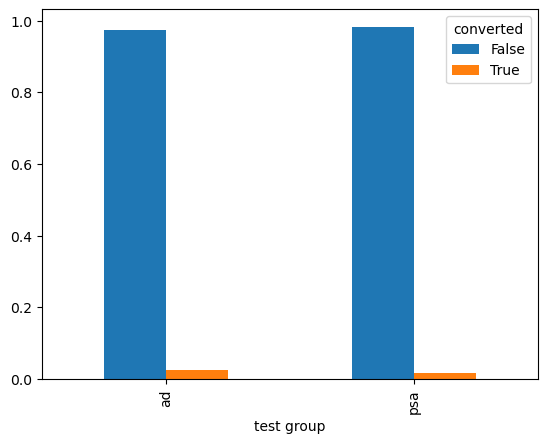

In [75]:
pd.crosstab(df['test group'] , df['converted'],normalize = 'index').plot(kind='bar')

<Axes: xlabel='most ads day'>

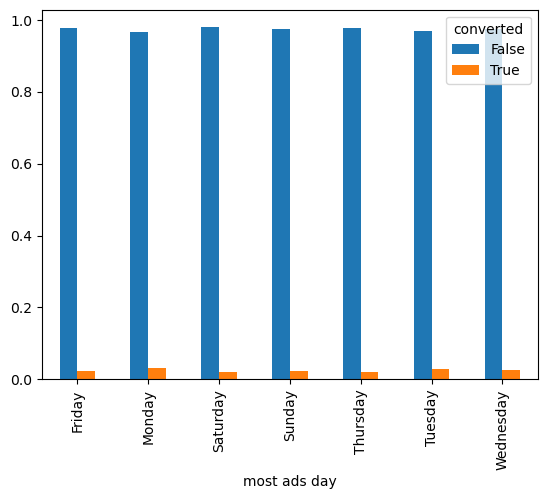

In [76]:
pd.crosstab(df['most ads day'] , df['converted'],normalize = 'index').plot(kind='bar')

<Axes: xlabel='most ads hour'>

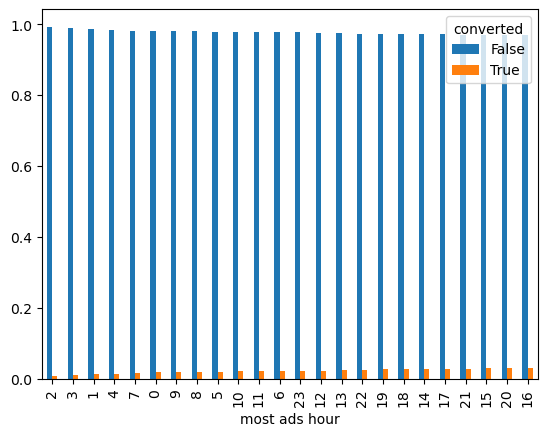

In [77]:
pd.crosstab(df['most ads hour'] , df['converted'],normalize = 'index').sort_values(by=True ,ascending=True).plot(kind='bar')

* What is the overall conversion rate in the ad group compared to the PSA group?
* Are there any patterns that might influence the results (e.g., the day/time people saw the ads)?

In [78]:
ad_group = df[df['test group'] == 'ad']
psa_group = df[df['test group'] == 'psa']

ad_conversion_rate = ad_group['converted'].mean()
psa_conversion_rate = psa_group['converted'].mean()

print(f"Ad Conversion Rate : {ad_conversion_rate}")
print(f"PSA Conversion Rate : {psa_conversion_rate}")

Ad Conversion Rate : 0.025546559636683747
PSA Conversion Rate : 0.01785410644448223


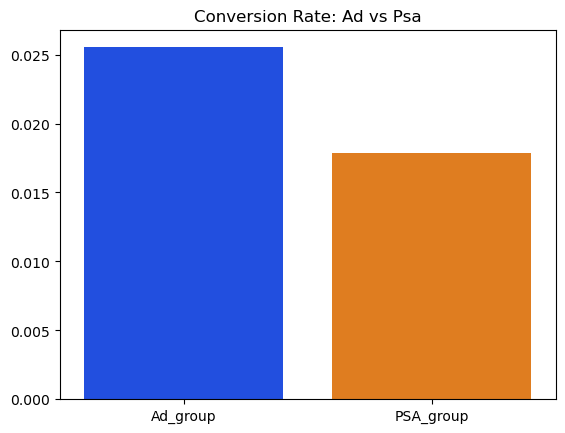

In [79]:
sns.barplot(x = ['Ad_group','PSA_group'] , y = [ad_conversion_rate , psa_conversion_rate], palette ='bright')
plt.title("Conversion Rate: Ad vs Psa")
plt.show()

## Statistical Test
Why Conduct Statistical Tests? : Just because the ad group’s conversion rate might look higher doesn’t mean it’s significantly higher. to ensure the observed difference isn’t due to random chance. This is where statistical testing comes in. In this case,i use a Chi-Squared test to check if the difference in conversion rates between the ad and PSA groups is statistically significant.

In [80]:
from scipy.stats import chi2_contingency
# Function to perform Chi-square test on each categorical variable
def chi_square_test(df, alpha=0.05):  # alpha is the significance level
    results = []
    cat_cols = df.select_dtypes(include=['object'])  # Select categorical columns

    for variable in cat_cols.columns:
        if variable != 'converted':  # Skip the target column
            contigency_table = pd.crosstab(df[variable], df['converted'])
            chi2, p, _, _ = chi2_contingency(contigency_table)

        if p < alpha:
          result = f'The difference in conversion rates across "{variable}" is statistically significant'
        else:
          result = f'There is no significant difference in conversion rates acorss "{variable}"'

        results.append(result)

    return results        
   

In [81]:
import pickle
def save_ab_test_results(df, file_path='ab_test_results.pkl'):
    # Perform chi-square test
    test_results = chi_square_test(df)
    
    # Save results to .pkl
    with open(file_path, 'wb') as f:
        pickle.dump(test_results, f)
    print(f"Results saved to {file_path}")

In [82]:
chi_square_test(df)

['The difference in conversion rates across "test group" is statistically significant',
 'The difference in conversion rates across "most ads day" is statistically significant',
 'The difference in conversion rates across "most ads hour" is statistically significant']

In [83]:
save_ab_test_results(df)

Results saved to ab_test_results.pkl
